In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely import wkt
import folium
import networkx as nx
import scipy.stats as stats
from scipy.stats import shapiro

## **Análisis preliminar:**

In [9]:

df = pd.read_csv('..\data.csv')

In [10]:
df.head()
# Display the first few rows of the DataFrame

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,LOCALITY,NBHD
0,2020,1,1,0,26.66,0.03,86.19,7.87,40.0,100.66,0.0,-999.0,0.0,24.19,25.42,10.13,-999.0,Centro,BarrioAbajo
1,2020,1,1,1,26.56,0.03,85.81,8.02,41.8,100.58,0.0,-999.0,0.0,24.01,25.29,10.31,-999.0,Centro,BarrioAbajo
2,2020,1,1,2,26.43,0.02,85.59,8.05,42.7,100.52,0.0,-999.0,0.0,23.84,25.14,10.33,-999.0,Centro,BarrioAbajo
3,2020,1,1,3,26.35,0.00,84.96,8.01,43.7,100.49,0.0,-999.0,0.0,23.63,24.99,10.25,-999.0,Centro,BarrioAbajo
4,2020,1,1,4,26.27,0.00,84.21,7.88,45.6,100.49,0.0,-999.0,0.0,23.42,24.85,10.08,-999.0,Centro,BarrioAbajo


In [11]:
df.shape
# Display the shape of the DataFrame (number of rows and columns)

(1535519, 19)

In [12]:
df.columns
# Display the columns of the DataFrame

Index(['YEAR', 'MO', 'DY', 'HR', 'T2M', 'PRECTOTCORR', 'RH2M', 'WS10M',
       'WD10M', 'PS', 'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SRF_ALB',
       'ALLSKY_SFC_SW_DIFF', 'T2MDEW', 'T2MWET', 'WS50M', 'ALLSKY_KT',
       'LOCALITY', 'NBHD'],
      dtype='object')

### **Variables: análisis de tipos,nulos y Nan values**


- **T2M:** MERRA-2 Temperatura a 2 Metros (°C)
- **RH2M:** MERRA-2 Humedad Relativa a 2 Metros (%)
- **PRECTOTCORR:** MERRA-2 Precipitación Corregida (mm/hora)
- **WS10M:** MERRA-2 Velocidad del Viento a 10 Metros (m/s)
- **WD10M:** MERRA-2 Dirección del Viento a 10 Metros (Grados)
- **PS:** MERRA-2 Presión Superficial (kPa)
- **ALLSKY_SFC_UV_INDEX:** CERES SYN1deg Índice UV en Superficie Bajo Cielo Total (W m-2 x 40)
- **ALLSKY_SFC_SW_DIFF:** CERES SYN1deg Irradiancia Difusa de Onda Corta en Superficie Bajo Cielo Total (Wh/m^2)
- **ALLSKY_SRF_ALB:** CERES SYN1deg Albedo Superficial Bajo Cielo Total (adimensional)
- **T2MDEW:** MERRA-2 Punto de Rocío/Escarcha a 2 Metros (°C)
- **T2MWET:** MERRA-2 Temperatura de Bulbo Húmedo a 2 Metros (°C)
- **WS50M:** MERRA-2 Velocidad del Viento a 50 Metros (m/s)
- **ALLSKY_KT:** CERES SYN1deg Índice de Claridad de Insolación Bajo Cielo Total (adimensional)	
- **Loacality:** Es la localidad
- **NHBD:**	 Neighborhood, es el barrio donde fueron tomados los datos.	

---

En el análisis de datos  tipo meteorológicos y climáticos, es común encontrar **valores faltantes** que no pueden ser calculados o que están fuera del rango de disponibilidad de las fuentes. Estos valores en este caso han sido representados con un código específico, como **-999**, para indicar su ausencia. En este contexto, se trabajó con un conjunto de variables. Estos mismos, provenientes de fuentes como **MERRA-2** y **CERES SYN1deg**, son fundamentales para estudios climáticos, pero requieren un manejo cuidadoso de los **valores faltantes** para garantizar la precisión y confiabilidad de los análisis.

In [14]:
df.dtypes
# Display the data types of each column

YEAR                     int64
MO                       int64
DY                       int64
HR                       int64
T2M                    float64
PRECTOTCORR            float64
RH2M                   float64
WS10M                  float64
WD10M                  float64
PS                     float64
ALLSKY_SFC_UV_INDEX    float64
ALLSKY_SRF_ALB         float64
ALLSKY_SFC_SW_DIFF     float64
T2MDEW                 float64
T2MWET                 float64
WS50M                  float64
ALLSKY_KT              float64
LOCALITY                object
NBHD                    object
dtype: object

In [15]:
print(df.isnull().sum())
# Display the number of missing values in each column

YEAR                   0
MO                     0
DY                     0
HR                     0
T2M                    0
PRECTOTCORR            0
RH2M                   0
WS10M                  0
WD10M                  0
PS                     0
ALLSKY_SFC_UV_INDEX    0
ALLSKY_SRF_ALB         0
ALLSKY_SFC_SW_DIFF     0
T2MDEW                 0
T2MWET                 0
WS50M                  0
ALLSKY_KT              0
LOCALITY               0
NBHD                   0
dtype: int64


In [16]:
count_neg_999 = (df == -999).sum()
print("\nCount of -999 values in each column:")
print(count_neg_999)


Count of -999 values in each column:
YEAR                        0
MO                          0
DY                          0
HR                          0
T2M                         0
PRECTOTCORR                 0
RH2M                        0
WS10M                       0
WD10M                       0
PS                          0
ALLSKY_SFC_UV_INDEX    130425
ALLSKY_SRF_ALB         365040
ALLSKY_SFC_SW_DIFF     579409
T2MDEW                      0
T2MWET                      0
WS50M                       0
ALLSKY_KT              814249
LOCALITY                    0
NBHD                        0
dtype: int64


In [17]:
# Seleccionar solo las columnas numéricas para evitar modificar las categóricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Reemplazar -999.0 por NaN SOLO en las columnas numéricas
df_cleaned = df.copy()  # Crear una copia del dataframe original
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].replace(-999.0, np.nan)

# Calcular los datos faltantes sin modificar las columnas de texto
missing_per_col = df_cleaned.isnull().sum() / len(df_cleaned) * 100  # % de valores faltantes por columna

# Calcular porcentaje total de datos faltantes
total_missing = df_cleaned.isnull().sum().sum()
total_values = df_cleaned.size
missing_percentage = (total_missing / total_values) * 100

print("Porcentaje de datos faltantes por variable:\n", missing_per_col)
print("\nPorcentaje total de datos faltantes:", round(missing_percentage, 2), "%")

Porcentaje de datos faltantes por variable:
 YEAR                    0.000000
MO                      0.000000
DY                      0.000000
HR                      0.000000
T2M                     0.000000
PRECTOTCORR             0.000000
RH2M                    0.000000
WS10M                   0.000000
WD10M                   0.000000
PS                      0.000000
ALLSKY_SFC_UV_INDEX     8.493871
ALLSKY_SRF_ALB         23.773070
ALLSKY_SFC_SW_DIFF     37.733756
T2MDEW                  0.000000
T2MWET                  0.000000
WS50M                   0.000000
ALLSKY_KT              53.027608
LOCALITY                0.000000
NBHD                    0.000000
dtype: float64

Porcentaje total de datos faltantes: 6.48 %


El dataset presenta un **6.48%** de datos faltantes en general, pero este porcentaje varía considerablemente entre las variables. Las variables con mayor porcentaje de datos faltantes son:
Variable	Porcentaje de Datos Faltantes
- **ALLSKY_SFC_UV_INDEX**	8.49%
- **ALLSKY_SRF_ALB**	23.77%
- **ALLSKY_SFC_SW_DIFF**	37.73%
- **ALLSKY_KT**	53.03%
Estos valores faltantes están representados con el valor -999, que indica que los datos no pudieron calcularse o están fuera del rango de disponibilidad de las fuentes.
Los porcentajes anteriormente mostrados se pueden visualizar de una mejor manera en las graficas siguientes:

### **Análisis de correlación:**

In [18]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
# selecting only numeric columns for correlation analysis

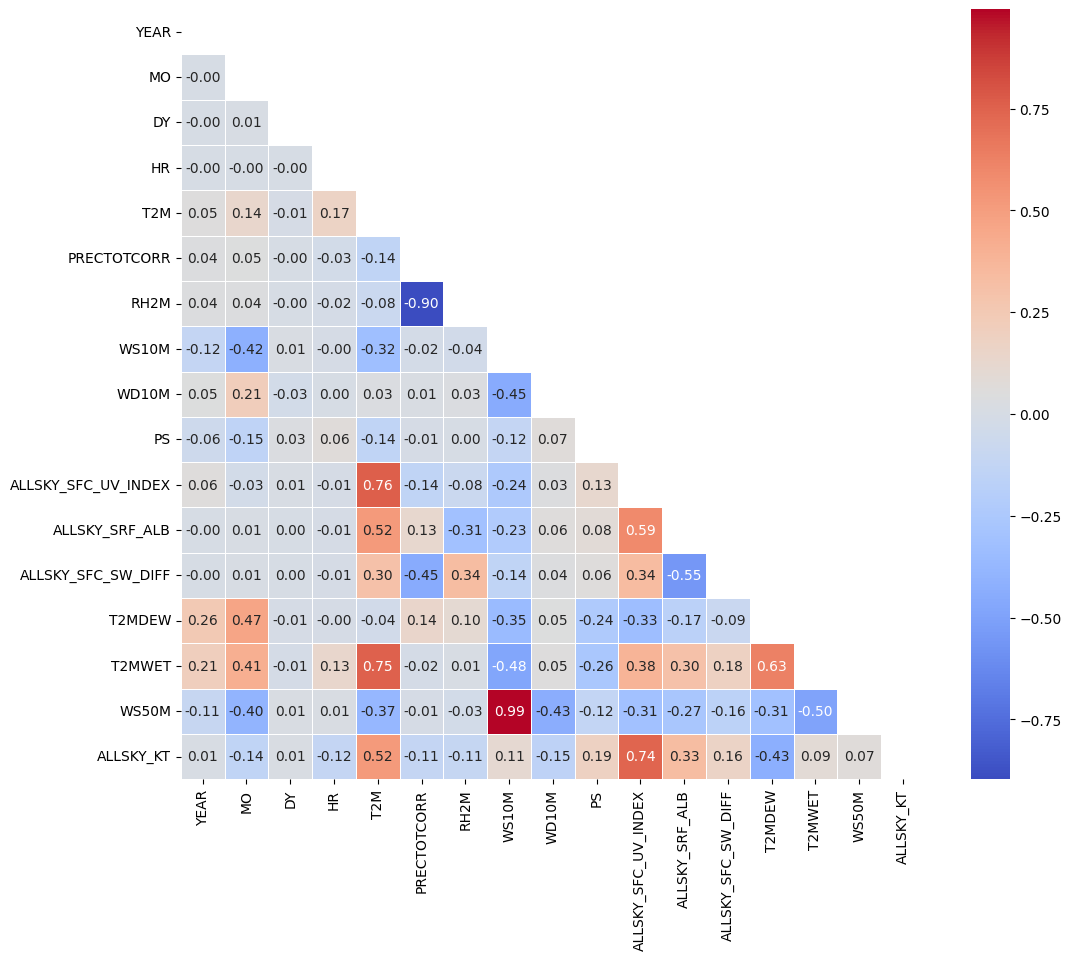

In [19]:
corr_matrix = df_cleaned[numeric_cols].corr()
# Calculate the correlation matrix for numeric columns
# Display the correlation matrix

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,mask=mask, annot= True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


#### **Análisis de Correlación entre Variables Climáticas** 

Este análisis busca entender las relaciones entre distintas variables climáticas para apoyar la planificación urbana y la optimización de energía renovable.  

#### **Puntos clave del análisis de correlación:**  

##### 1️. Temperatura y Radiación Solar 
- **T2M (Temperatura a 2m) y ALLSKY_SFC_SW_DIFF (Irradiancia de onda corta difusa)** tienen una fuerte correlación positiva (**~0.73**).  
- Esto indica que temperaturas más altas suelen estar asociadas con una mayor irradiancia solar difusa, lo que es clave para modelos de **energía solar**.  

##### 2️. Humedad y Precipitación 
- **RH2M (Humedad relativa a 2m) y PRECTOTCORR (Precipitación corregida)** presentan una correlación negativa moderada (**~ -0.76**).  
- A mayor precipitación, la humedad relativa disminuye, lo cual puede indicar **cambios abruptos en el clima urbano**.  

##### 3️. Viento y Altura 
- **WS10M (Viento a 10m) y WS50M (Viento a 50m) tienen una correlación de casi 0.99.**  
- Esto sugiere que la velocidad del viento a distintas alturas está altamente relacionada, lo que es útil para evaluar **viabilidad de proyectos eólicos**.  

##### 4️. Presión Superficial y Radiación Solar   
- **ALLSKY_SFC_UV_INDEX (Índice UV) y PS (Presión superficial)** tienen correlación negativa (**~ -0.25**).  
- Puede indicar que a mayor presión, la radiación UV en la superficie tiende a disminuir, lo que podría afectar la **eficiencia de paneles solares**, no obstante la relación entre ambas variables es bastante debil.  

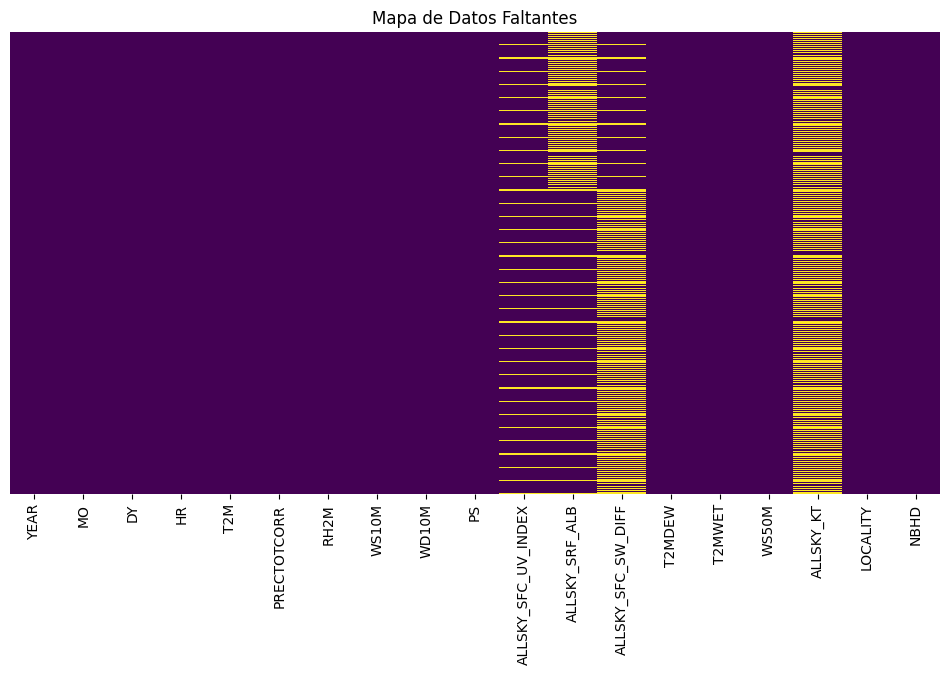

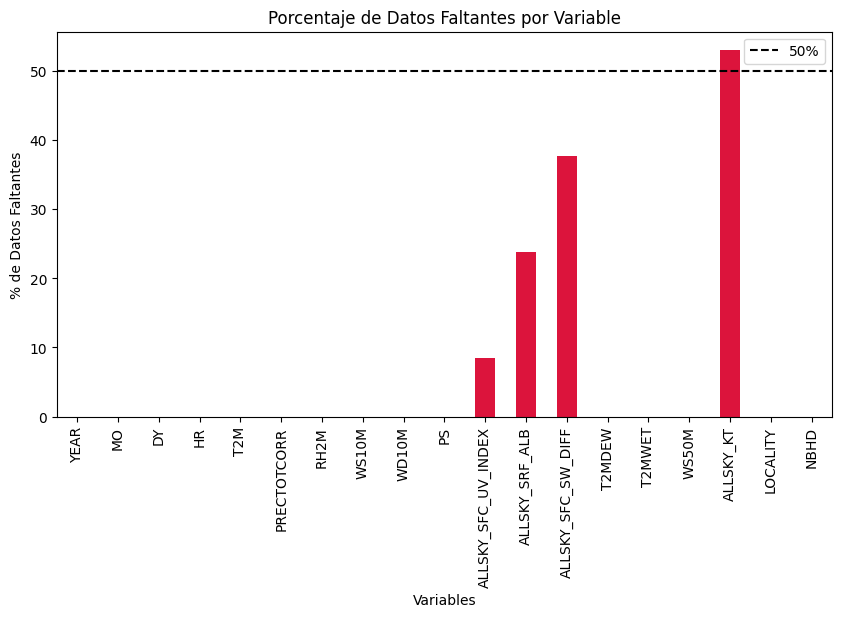

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de Datos Faltantes")
plt.show()
# Display a heatmap of missing values

# Display the percentage of missing values for each column
plt.figure(figsize=(10, 5))
missing_per_col.plot(kind="bar", color="crimson")
plt.axhline(y=50, color="black", linestyle="--", label="50%")
plt.xlabel("Variables")
plt.ylabel("% de Datos Faltantes")
plt.title("Porcentaje de Datos Faltantes por Variable")
plt.legend()
plt.show()

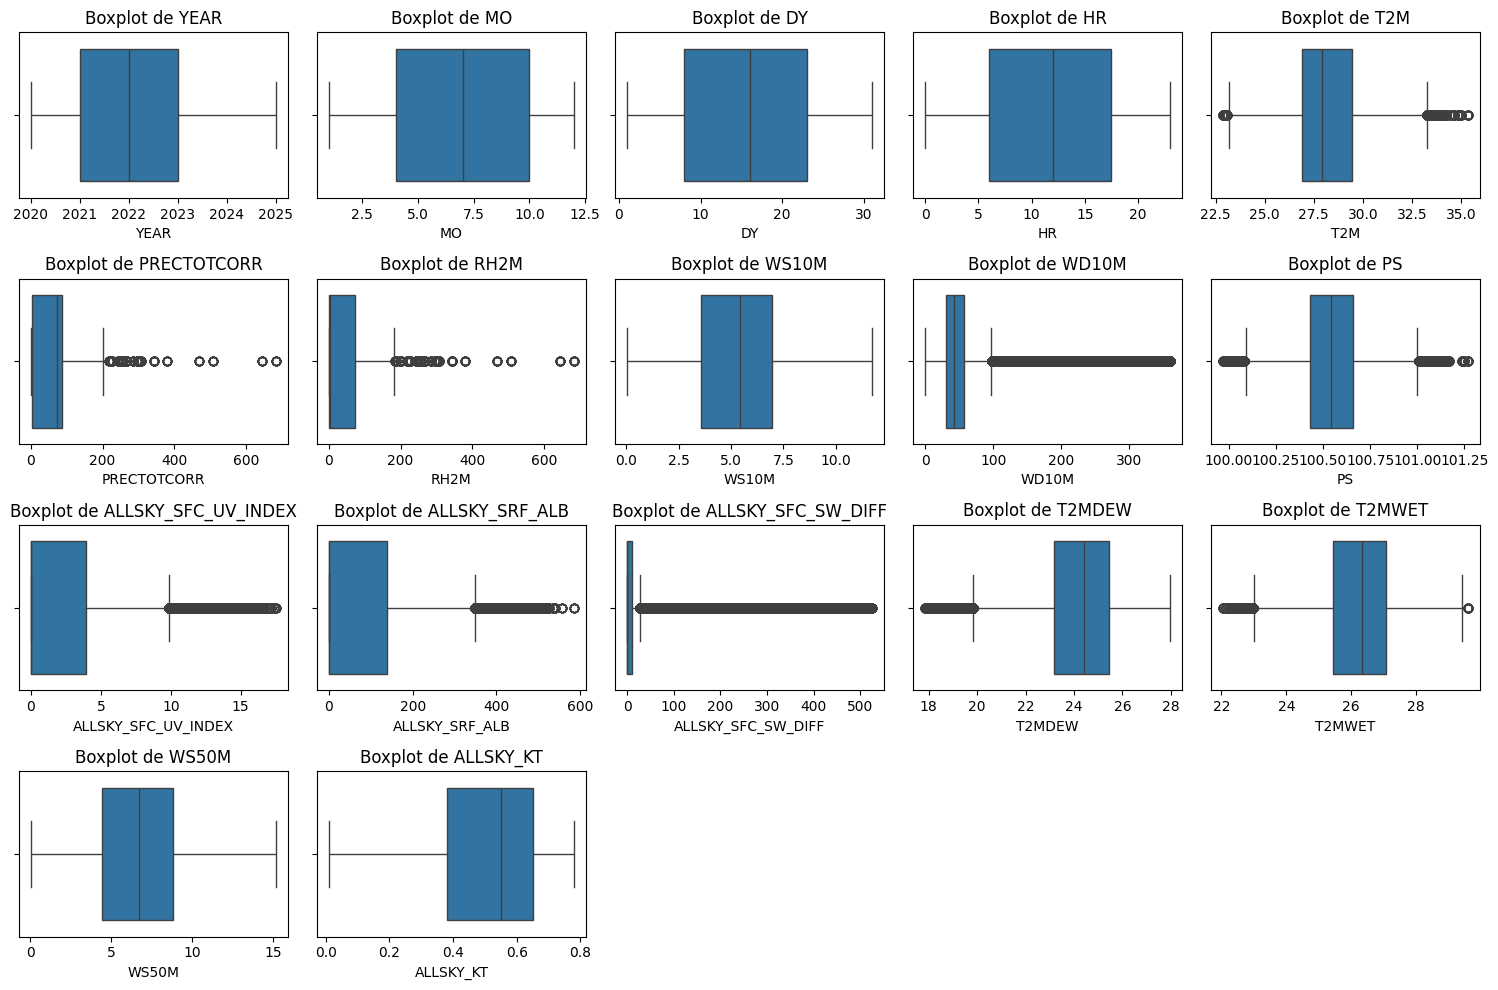

In [21]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
# Selecting only numeric columns for outlier analysis
# Create a boxplot for each numeric column to visualize outliers

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i) 
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.head()
# Display the first few rows of the cleaned DataFrame

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,LOCALITY,NBHD
0,2020,1,1,0,26.66,0.03,86.19,7.87,40.0,100.66,0.0,NaN,0.0,24.19,25.42,10.13,NaN,Centro,BarrioAbajo
1,2020,1,1,1,26.56,0.03,85.81,8.02,41.8,100.58,0.0,NaN,0.0,24.01,25.29,10.31,NaN,Centro,BarrioAbajo
2,2020,1,1,2,26.43,0.02,85.59,8.05,42.7,100.52,0.0,NaN,0.0,23.84,25.14,10.33,NaN,Centro,BarrioAbajo
3,2020,1,1,3,26.35,0.00,84.96,8.01,43.7,100.49,0.0,NaN,0.0,23.63,24.99,10.25,NaN,Centro,BarrioAbajo
4,2020,1,1,4,26.27,0.00,84.21,7.88,45.6,100.49,0.0,NaN,0.0,23.42,24.85,10.08,NaN,Centro,BarrioAbajo


In [23]:
round(df_cleaned.describe(),2)
# Display the summary statistics of the cleaned DataFrame

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT
count,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1405094.00,1170479.00,956110.00,1535519.00,1535519.00,1535519.00,721270.00
mean,2022.00,6.52,15.73,11.50,28.21,53.68,29.63,5.29,66.46,100.55,2.38,72.09,45.04,24.25,26.23,6.64,0.51
std,1.42,3.45,8.81,6.92,1.82,37.99,38.15,2.21,76.95,0.17,3.74,110.75,93.78,1.54,1.17,2.84,0.17
min,2020.00,1.00,1.00,0.00,22.88,0.00,0.00,0.04,0.00,99.97,0.00,0.00,0.00,17.85,22.05,0.04,0.01
25%,2021.00,4.00,8.00,6.00,26.91,2.60,0.09,3.56,30.30,100.43,0.00,0.00,0.02,23.19,25.44,4.44,0.38
50%,2022.00,7.00,16.00,12.00,27.93,71.73,3.13,5.41,42.00,100.54,0.00,0.15,0.13,24.43,26.33,6.73,0.55
75%,2023.00,10.00,23.00,17.50,29.46,86.14,73.71,6.97,57.20,100.66,3.95,139.15,11.10,25.43,27.08,8.79,0.65
max,2025.00,12.00,31.00,23.00,35.36,684.23,684.23,11.72,359.80,101.27,17.52,585.10,525.32,27.97,29.61,15.15,0.78


In [24]:
df_cleaned_limits = df_cleaned.copy()
# Define limits for each variable

limits = {
    'YEAR': {'min': 2020, 'max': 2025},
    'MO': {'min': 1, 'max': 12},
    'DY': {'min': 1, 'max': 31},
    'HR': {'min': 0, 'max': 23},
    'T2M': {'min': -90, 'max': 60},
    'RH2M': {'min': 0, 'max': 100},
    'PRECTOTCORR': {'min': 0, 'max': 300},
    'WS10M': {'min': 0, 'max': 80},
    'WD10M': {'min': 0, 'max': 360},
    'PS': {'min': 50, 'max': 110},
    'ALLSKY_SFC_UV_INDEX': {'min': 0, 'max': 15},
    'ALLSKY_SFC_SW_DIFF': {'min': 0, 'max': 1500},
    'ALLSKY_SRF_ALB': {'min': 0, 'max': 1},
    'T2MDEW': {'min': -45, 'max': 35},
    'T2MWET': {'min': -35, 'max': 35},
    'WS50M': {'min': 0, 'max': 75},
    'ALLSKY_KT': {'min': 0, 'max': 1},
}

# Apply limits to the DataFrame
for col, lim in limits.items():
    df_cleaned_limits[col] = df_cleaned_limits[col].apply(lambda x: np.nan if x < lim['min'] or x > lim['max'] else x)
# Display the first few rows of the DataFrame with limits applied

In [25]:
df_cleaned_limits.to_csv('df_cleaned.csv', index=False)
print("DataFrame exported successfully to 'df_cleaned.csv'")
# Export the cleaned DataFrame to a CSV file to be used in the models notebook

DataFrame exported successfully to 'df_cleaned.csv'


In [28]:
df_cleaned_limits.head(20)

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT,LOCALITY,NBHD
0,2020,1,1,0,26.66,0.03,86.19,7.87,40.0,100.66,0.00,NaN,0.00,24.19,25.42,10.13,NaN,Centro,BarrioAbajo
1,2020,1,1,1,26.56,0.03,85.81,8.02,41.8,100.58,0.00,NaN,0.00,24.01,25.29,10.31,NaN,Centro,BarrioAbajo
2,2020,1,1,2,26.43,0.02,85.59,8.05,42.7,100.52,0.00,NaN,0.00,23.84,25.14,10.33,NaN,Centro,BarrioAbajo
3,2020,1,1,3,26.35,0.00,84.96,8.01,43.7,100.49,0.00,NaN,0.00,23.63,24.99,10.25,NaN,Centro,BarrioAbajo
4,2020,1,1,4,26.27,0.00,84.21,7.88,45.6,100.49,0.00,NaN,0.00,23.42,24.85,10.08,NaN,Centro,BarrioAbajo
5,2020,1,1,5,26.20,0.00,83.65,7.80,48.5,100.51,0.00,NaN,0.00,23.23,24.71,10.02,NaN,Centro,BarrioAbajo
6,2020,1,1,6,26.22,0.00,83.05,7.58,51.6,100.58,0.03,0.14,22.18,23.14,24.68,9.65,0.27,Centro,BarrioAbajo
7,2020,1,1,7,26.85,0.00,79.78,7.18,53.7,100.68,0.43,0.15,128.03,23.08,24.96,8.88,0.45,Centro,BarrioAbajo
8,2020,1,1,8,28.00,0.00,72.01,6.97,55.7,100.76,1.92,0.14,192.92,22.49,25.24,8.54,0.55,Centro,BarrioAbajo
9,2020,1,1,9,29.11,0.00,65.72,6.34,56.3,100.78,4.50,0.14,219.85,22.02,25.57,7.69,0.63,Centro,BarrioAbajo


In [26]:
round(df_cleaned_limits.describe(),2)
# Display the summary statistics of the DataFrame with limits applied

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WS10M,WD10M,PS,ALLSKY_SFC_UV_INDEX,ALLSKY_SRF_ALB,ALLSKY_SFC_SW_DIFF,T2MDEW,T2MWET,WS50M,ALLSKY_KT
count,1535519.00,1535519.00,1535519.00,1535519.00,1535519.00,1535387.00,1533288.00,1535519.00,1535519.00,1535519.00,1401749.00,696538.00,956110.00,1535519.00,1535519.00,1535519.00,721270.00
mean,2022.00,6.52,15.73,11.50,28.21,53.65,29.41,5.29,66.46,100.55,2.35,0.05,45.04,24.25,26.23,6.64,0.51
std,1.42,3.45,8.81,6.92,1.82,37.82,37.51,2.21,76.95,0.17,3.69,0.07,93.78,1.54,1.17,2.84,0.17
min,2020.00,1.00,1.00,0.00,22.88,0.00,0.00,0.04,0.00,99.97,0.00,0.00,0.00,17.85,22.05,0.04,0.01
25%,2021.00,4.00,8.00,6.00,26.91,2.60,0.09,3.56,30.30,100.43,0.00,0.00,0.02,23.19,25.44,4.44,0.38
50%,2022.00,7.00,16.00,12.00,27.93,71.73,3.12,5.41,42.00,100.54,0.00,0.00,0.13,24.43,26.33,6.73,0.55
75%,2023.00,10.00,23.00,17.50,29.46,86.14,73.53,6.97,57.20,100.66,3.88,0.14,11.10,25.43,27.08,8.79,0.65
max,2025.00,12.00,31.00,23.00,35.36,295.23,99.91,11.72,359.80,101.27,15.00,0.99,525.32,27.97,29.61,15.15,0.78


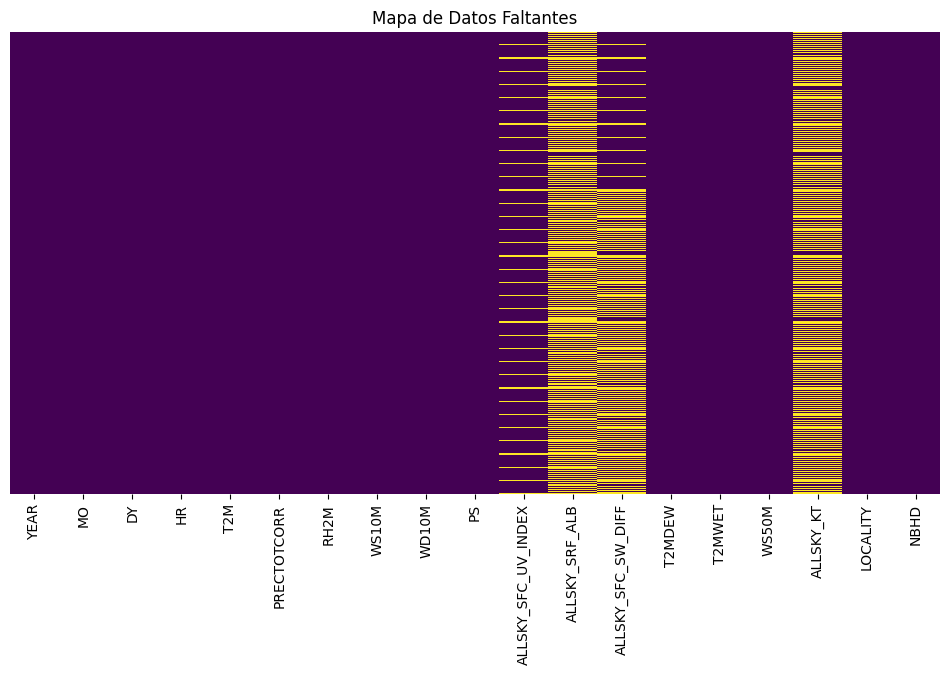

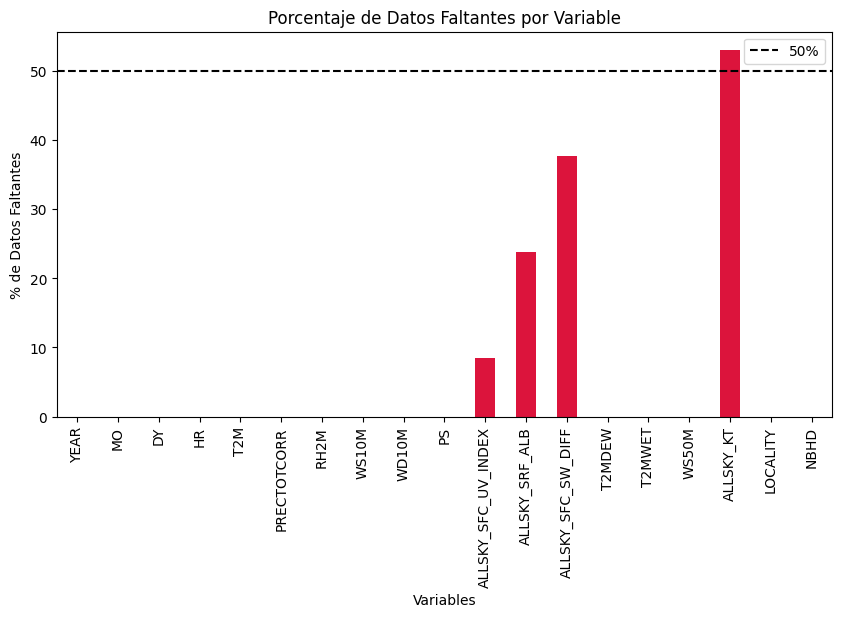

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned_limits.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de Datos Faltantes")
plt.show()
# Display a heatmap of missing values

# Display the percentage of missing values for each column
plt.figure(figsize=(10, 5))
missing_per_col.plot(kind="bar", color="crimson")
plt.axhline(y=50, color="black", linestyle="--", label="50%")
plt.xlabel("Variables")
plt.ylabel("% de Datos Faltantes")
plt.title("Porcentaje de Datos Faltantes por Variable")
plt.legend()
plt.show()

In [29]:
localidades = df_cleaned_limits['LOCALITY'].unique()
print("Localidades únicas:", localidades)
# Display unique localities in the DataFrame

Localidades únicas: ['Centro' 'Sur' 'Occidente' 'Oriente' 'Norte']


In [31]:
categorical_cols = df_cleaned_limits.select_dtypes(include=['object']).columns
# Selecting only categorical columns for analysis
numeric_colss = df_cleaned_limits.select_dtypes(include=['number']).columns
# Selecting only numeric columns for analysis

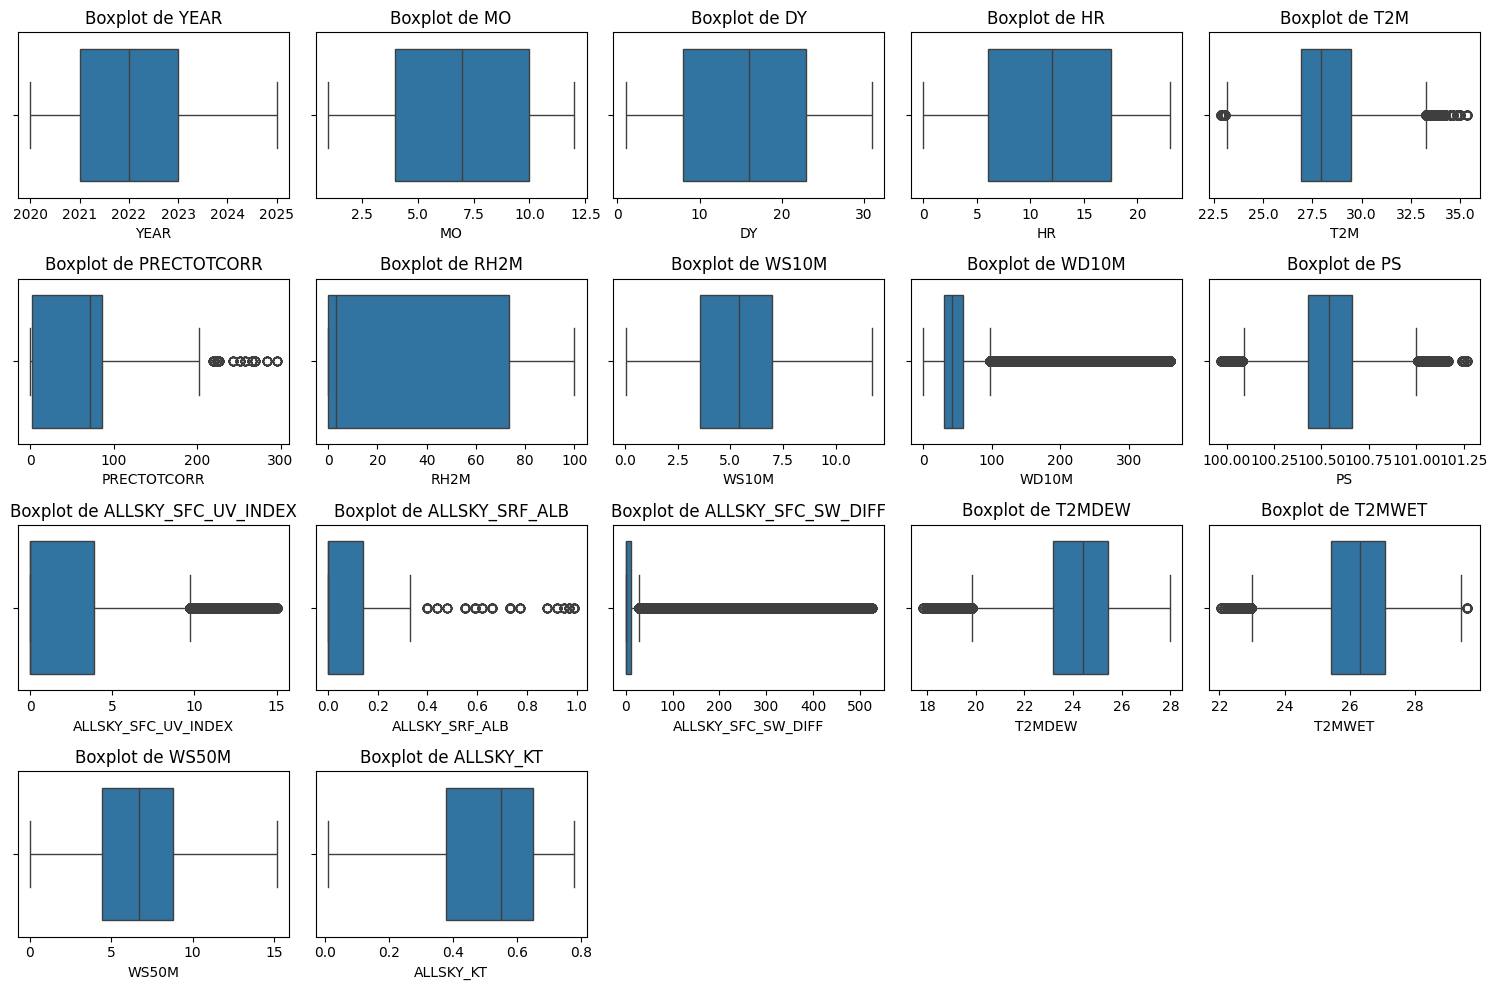

In [ ]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 5, i) 
    sns.boxplot(data=df_cleaned_limits, x=col)
    plt.title(f'Boxplot de {col}')
# Display a boxplot for each numeric column to visualize outliers
plt.tight_layout()
plt.show()

### **Análisis de Normalidad y Distribución de Variables**

In [ ]:


normality_results = {}
for col in numeric_cols:
    stat, p_value = stats.shapiro(df_cleaned_limits[col].dropna())
    normality_results[col] = {'Statistic': stat, 'p-value': p_value}
# Display the results of the Shapiro-Wilk test for normality

normality_df = pd.DataFrame(normality_results).T
print(normality_df)

chi2_results = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(df_cleaned_limits['LOCALITY'], df_cleaned_limits[col])
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    chi2_results[col] = {'Chi2': chi2, 'p-value': p, 'dof': dof}

# Display the results of the Chi-squared test for each categorical variable
chi2_df = pd.DataFrame(chi2_results).T
print(chi2_df)


c:\Users\jesus\miniconda3\envs\testml_env\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


                     Statistic  p-value
YEAR                  0.902474      0.0
MO                    0.943161      0.0
DY                    0.951996      0.0
HR                    0.945347      0.0
T2M                   0.982821      0.0
PRECTOTCORR           0.766861      0.0
RH2M                  0.704668      0.0
WS10M                 0.988252      0.0
WD10M                 0.572860      0.0
PS                    0.996135      0.0
ALLSKY_SFC_UV_INDEX   0.687594      0.0
ALLSKY_SRF_ALB        0.656792      0.0
ALLSKY_SFC_SW_DIFF    0.554192      0.0
T2MDEW                0.983023      0.0
T2MWET                0.991703      0.0
WS50M                 0.988792      0.0
ALLSKY_KT             0.940963      0.0
                  Chi2  p-value    dof
LOCALITY  6.142076e+06      0.0   16.0
NBHD      4.167836e+06      0.0  100.0


El test de normalidad proporciona un valor estadístico y un **p-valor**. Si el **p-valor** es menor a 0.05, significa que rechazamos la hipótesis nula de que la variable sigue una distribución normal.  

---

### **Resultados Clave:**

##### **Variables con mejor ajuste a la normalidad** (mayores estadísticas y p-valores más altos, pero aún no completamente normales):

- **T2M** (Temperatura a 2 metros): $ p = 7.63 \times 10^{-107} $
- **T2MDEW** (Punto de rocío a 2 metros): $ p = 6.92 \times 10^{-107} $
- **T2MWET** (Temperatura húmeda a 2 metros): $ p = 1.67 \times 10^{-90} $
- **WS10M** (Viento a 10 metros): $ p = 4.65 \times 10^{-97} $
- **WS50M** (Viento a 50 metros): $ p = 1.74 \times 10^{-94} $

Estas variables están relativamente cerca de una normalidad aceptable, aunque siguen mostrando desviaciones.

##### **Variables que NO siguen una distribución normal** (p-valores extremadamente pequeños, estadística baja):

- **WD10M** (Dirección del viento a 10m): $ p = 8.73 \times 10^{-211} $ (muy no normal)
- **ALLSKY_SFC_SW_DIFF** (Radiación solar difusa): $ p = 1.65 \times 10^{-222} $
- **ALLSKY_SRF_ALB** (Albedo superficial): $ p = 3.45 \times 10^{-220} $
- **RH2M** (Humedad relativa a 2m): $ p = 5.41 \times 10^{-197} $
- **PRECTOTCORR** (Precipitación corregida): $ p = 5.14 \times 10^{-188} $
- **ALLSKY_SFC_UV_INDEX** (Índice UV): $ p = 2.21 \times 10^{-202} $
- **ALLSKY_KT** (Transmisión atmosférica): $ p = 2.50 \times 10^{-179} $

Estas variables muestran una distribución altamente sesgada o multimodal, lo que indica que no siguen una normalidad en absoluto.

##### **Variables de tiempo (año, mes, día, hora)**

- **YEAR**: $ p = 1.91 \times 10^{-162} $
- **MO**: $ p = 8.82 \times 10^{-142} $
- **DY**: $ p = 2.42 \times 10^{-134} $
- **HR**: $ p = 2.95 \times 10^{-136} $

Estas variables tienen p-valores extremadamente pequeños, indicando que su distribución no es normal (lo cual era esperable porque el tiempo no suele distribuirse normalmente).

---

### **Análisis de Variables Categóricas**  

El test de **Chi-cuadrado** analiza si la distribución de categorías en "LOCALITY" y "NBHD" es uniforme o tiene patrones significativos.  

- **LOCALITY ($\chi^2 = 6,142,076, p = 0.0$)**  
  - Indica una distribución altamente no uniforme de las localidades.  
- **NBHD ($\chi^2 = 4,167,836, p = 0.0$)**  
  - También muestra que la distribución de barrios no es uniforme en absoluto.

Esto sugiere que algunos barrios/localidades tienen una concentración mucho mayor de registros que otros.

---

### **Conclusiones**

- **Ninguna variable numérica sigue una distribución normal**. Algunas se acercan (T2M, T2MDEW, T2MWET), pero siguen sin cumplir el criterio de normalidad.
- **Muchas variables climáticas tienen distribuciones sesgadas o multimodales** (especialmente precipitación, humedad y radiación solar).
- **Las variables categóricas muestran una distribución no uniforme**, lo que sugiere que ciertos barrios/localidades tienen más representación en los datos.


bla bla